In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pylab as pylab
import cartopy.feature as cfeature
from endgame import hist2d
import scipy.stats as stats
import xarray as xr
import ipdb
import glob
import itertools
import numpy.ma as ma
from utils import u_statistics as u_stat
from scipy.stats import gaussian_kde
import pickle as pkl
from utils import u_plot as uplot
import pandas as pd
from scipy.stats import gaussian_kde, linregress
import matplotlib.cm as cm
from utils import u_met
import seaborn
import metpy
from metpy import calc
from metpy.units import units
import statsmodels.api as sm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from numpy.polynomial import polynomial as P

##for regridding, install xesmf:
# conda install esmpy
# pip install xesmf
from utils import constants as cnst

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


Loads bulk statistics derived from having cut out storms (saved in MCSfiles), OBS includes rainfall from TRMM radar

In [3]:
import os
all_files = glob.glob('/media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_*')

months = np.array(['07', '08','09'])#np.array(['06','07','08','09'])#([ '03', '04', '05', '06', '09', '10', '11'])

hist_files = []
#del allhist
for alls in all_files:
    if alls[-11:-9] not in months:
        continue
    else:
        hist_files.append(alls)
#hist_files = all_files

In [55]:
dummy = xr.open_dataset(hist_files[0], decode_times=False).sel(longitude=slice(-19,30), latitude=slice(4,30))
grid = dummy.salem.grid.regrid(factor=0.27) # at 15km
dummy_trans, lut = grid.lookup_transform(dummy['lsRain'], return_lut=True)

In [ ]:
histlist = []
for f in hist_files:
    print('Doing', f)
    cph = xr.open_dataset(f, decode_times=False).sel(longitude=slice(-19,30), latitude=slice(4,30))
    prcp = cph['lsRain']*3600
    
    dat_prcp = grid.lookup_transform(prcp, lut=lut, method=np.mean)
    ds = grid.to_dataset()
    prcp = xr.DataArray(dat_prcp, coords=[prcp['time'],ds['y'], ds['x']], dims=['time','latitude','longitude'])
    
    #ipdb.set_trace()
    if prcp.values.ndim != 3:
        continue
#     isin = prcp.max(axis=0)
#     pos = np.where(isin < 5)

    

    prcp = prcp.max(axis=0) #sum
    prcp.values[prcp.values<5] = np.nan
    
    if np.nanmin(prcp.values)<5:
        ipdb.set_trace()
    histlist.append(prcp)
    #plt.contourf(prcp)
    #ipdb.set_trace()
allhist = xr.concat(histlist, dim='dummy', coords='minimal', compat='override')
del cph

Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200109090030-200109092330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ad251_4km_199807010030-199807012330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ad251_4km_199807020030-199807022330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ad251_4km_199807030030-199807032330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ad251_4km_199807040030-199807042330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ad251_4km_199807050030-199807052330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ad251_4km_199807060030-199807062330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ad251_4km_199807070030-19980707

Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ad251_4km_199809130030-199809132330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ad251_4km_199809140030-199809142330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ad251_4km_199809150030-199809152330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ad251_4km_199809160030-199809162330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ad251_4km_199809170030-199809172330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ad251_4km_199809180030-199809182330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ad251_4km_199807090030-199807092330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ad251_4km_199807190030-19980719

Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ag057_4km_199908170030-199908172330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ag057_4km_199908180030-199908182330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ag057_4km_199908200030-199908202330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ag057_4km_199908210030-199908212330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ag057_4km_199908220030-199908222330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ag057_4km_199908230030-199908232330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ag057_4km_199908240030-199908242330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ag057_4km_199908250030-19990825

Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200007180030-200007182330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200007200030-200007202330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200007210030-200007212330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200007220030-200007222330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200007230030-200007232330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200007240030-200007242330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200007250030-200007252330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200007260030-20000726

Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200009280030-200009282330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200009300030-200009302330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200008190030-200008192330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200008290030-200008292330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200009090030-200009092330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200009190030-200009192330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200009290030-200009292330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200107010030-20010701

Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200109060030-200109062330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200109070030-200109072330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200109080030-200109082330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200107090030-200107092330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200107190030-200107192330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200107290030-200107292330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200108090030-200108092330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200108190030-20010819

Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200208110030-200208112330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200208120030-200208122330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200208130030-200208132330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200208140030-200208142330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200208150030-200208152330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200208160030-200208162330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200208170030-200208172330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200208180030-20020818

Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200307140030-200307142330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200307150030-200307152330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200307160030-200307162330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200307170030-200307172330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200307180030-200307182330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200307200030-200307202330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200307210030-200307212330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200307220030-20030722

Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200309250030-200309252330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200309260030-200309262330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200309270030-200309272330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200309280030-200309282330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200309300030-200309302330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200308090030-200308092330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200308190030-200308192330.nc
Doing /media/ck/Elements/Africa/WestAfrica/CP4/CP4hist/lsRain/lsRain_fullPL__A1hr_mean_ah261_4km_200308290030-20030829

In [38]:
hm = allhist.quantile(0.95, dim='dummy')
hm.to_netcdf('/home/ck/DIR/cornkle/figs/ENDGAME/dave_map/CP4hist_p95Rain_gt5mmDailyMax.nc')

/home/ck/miniconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


In [5]:
if np.nanmin(allhist.isel(dummy=slice(1,100))) <1:
    print('SOMETHING WRONG WITH DATA')

In [39]:
all_files = glob.glob('/media/ck/Elements/Africa/WestAfrica/CP4/CP4fut/lsRain/lsRain_*')
import os
months = np.array(['07', '08','09'])#np.array(['06','07','08','09'])#([ '03', '04', '05', '06', '09', '10', '11'])

fut_files = []
#del allfut
for alls in all_files:
    if alls[-11:-9] not in months:
        continue
    else:
        fut_files.append(alls)
#fut_files = all_files

In [40]:
futlist = []
for f in fut_files:
    cph = xr.open_dataset(f, decode_times=False).sel(longitude=slice(-20,20), latitude=slice(3.5,25))
    prcp = cph['lsRain']*3600
    
    dat_prcp = grid.lookup_transform(prcp, lut=lut, method=np.mean)
    ds = grid.to_dataset()
    prcp = xr.DataArray(dat_prcp, coords=[prcp['time'],ds['y'], ds['x']], dims=['time','latitude','longitude'])
    
    if prcp.values.ndim != 3:
        continue
    isin = prcp.max(axis=0)
    pos = np.where(isin < 5)

    prcp = prcp.sum(axis=0)
    prcp.values[pos] = np.nan

    if np.nanmin(prcp.values)<5:
        ipdb.set_trace()
    futlist.append(prcp)
allfut = xr.concat(futlist, dim='dummy', coords='minimal', compat='override')
del cph

In [41]:
fm = allfut.quantile(0.95, dim='dummy')
fm.to_netcdf('/home/ck/DIR/cornkle/figs/ENDGAME/dave_map/CP4fut_p95Rain_gt5mm.nc')

/home/ck/miniconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


In [4]:
sahel_hist = allhist.sel(latitude=slice(8,12), longitude=slice(-10,10)).values
sahel_fut = allfut.sel(latitude=slice(8,12), longitude=slice(-10,10)).values

NameError: name 'allhist' is not defined

In [9]:
sahel_hist = sahel_hist.flatten()[np.isfinite(sahel_hist.flatten())]
sahel_fut = sahel_fut.flatten()[np.isfinite(sahel_fut.flatten())]

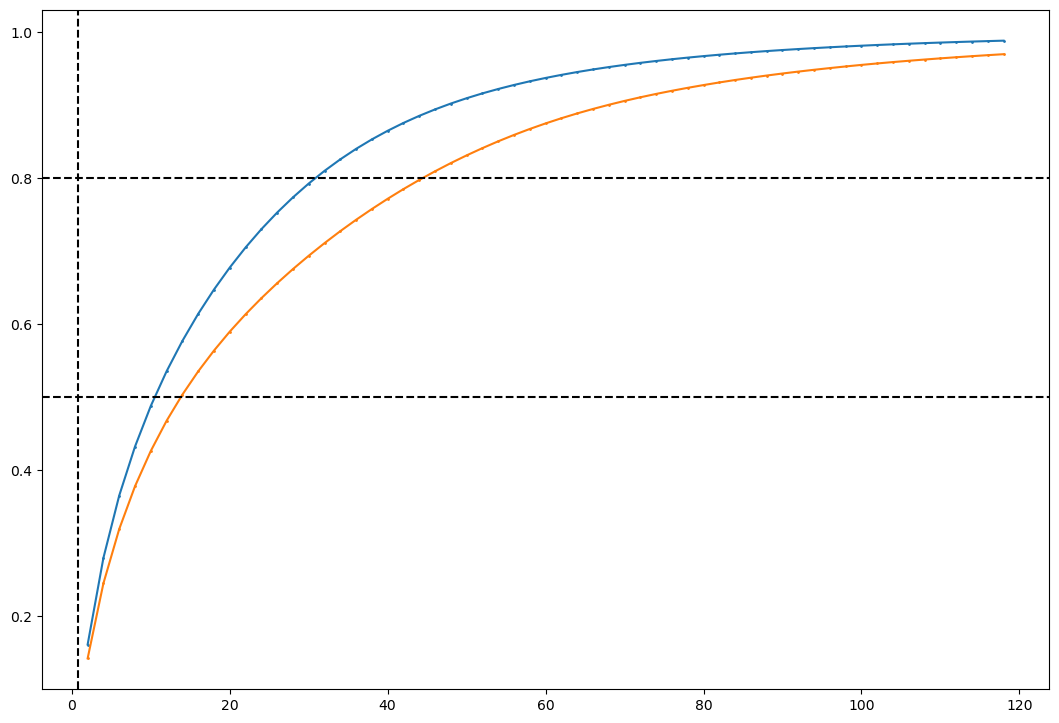

In [10]:
f = plt.figure(figsize=(13,9), dpi=100)
ax = f.add_subplot(111)
#ipdb.set_trace()
nball, allcount, bins = u_stat.histo_frequency(sahel_hist, bins=np.arange(1, 120, 2))
#ipdb.set_trace()
bin_centre = bins[0:-1] + ((bins[1::] - bins[0:-1]) / 2)
cumulative = np.cumsum(nball)
ax.plot(bin_centre,cumulative, marker='o', markersize=1)

#ipdb.set_trace()
nball, allcount, bins = u_stat.histo_frequency(sahel_fut, bins=np.arange(1, 120, 2))
#ipdb.set_trace()
bin_centre = bins[0:-1] + ((bins[1::] - bins[0:-1]) / 2)
cumulative = np.cumsum(nball)
ax.plot(bin_centre,cumulative,  marker='o', markersize=1)
plt.axhline(0.5, linestyle='dashed', color='k')
plt.axhline(0.8, linestyle='dashed', color='k')
plt.axvline(0.8, linestyle='dashed', color='k')

In [3]:
hm = xr.open_dataarray('/home/ck/DIR/cornkle/figs/ENDGAME/dave_map/CP4hist_p95Rain_gt5mm.nc')
fm = xr.open_dataarray('/home/ck/DIR/cornkle/figs/ENDGAME/dave_map/CP4fut_p95Rain_gt5mm.nc')
hm = hm.sel(latitude=slice(3.5,25), longitude=slice(-20,20))
fm = fm.sel(latitude=slice(3.5,25), longitude=slice(-20,20))

In [33]:
def draw_map(ax, dat, lat, lon, title='', levels=None, label=None, cmap=None):
   
    plt.contourf(lon, lat, dat, transform=ccrs.PlateCarree(), extend='both', levels=levels, cmap=cmap)
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.top_labels = False
    xl.right_labels = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    ax.set_facecolor('lightgrey')
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label(label)

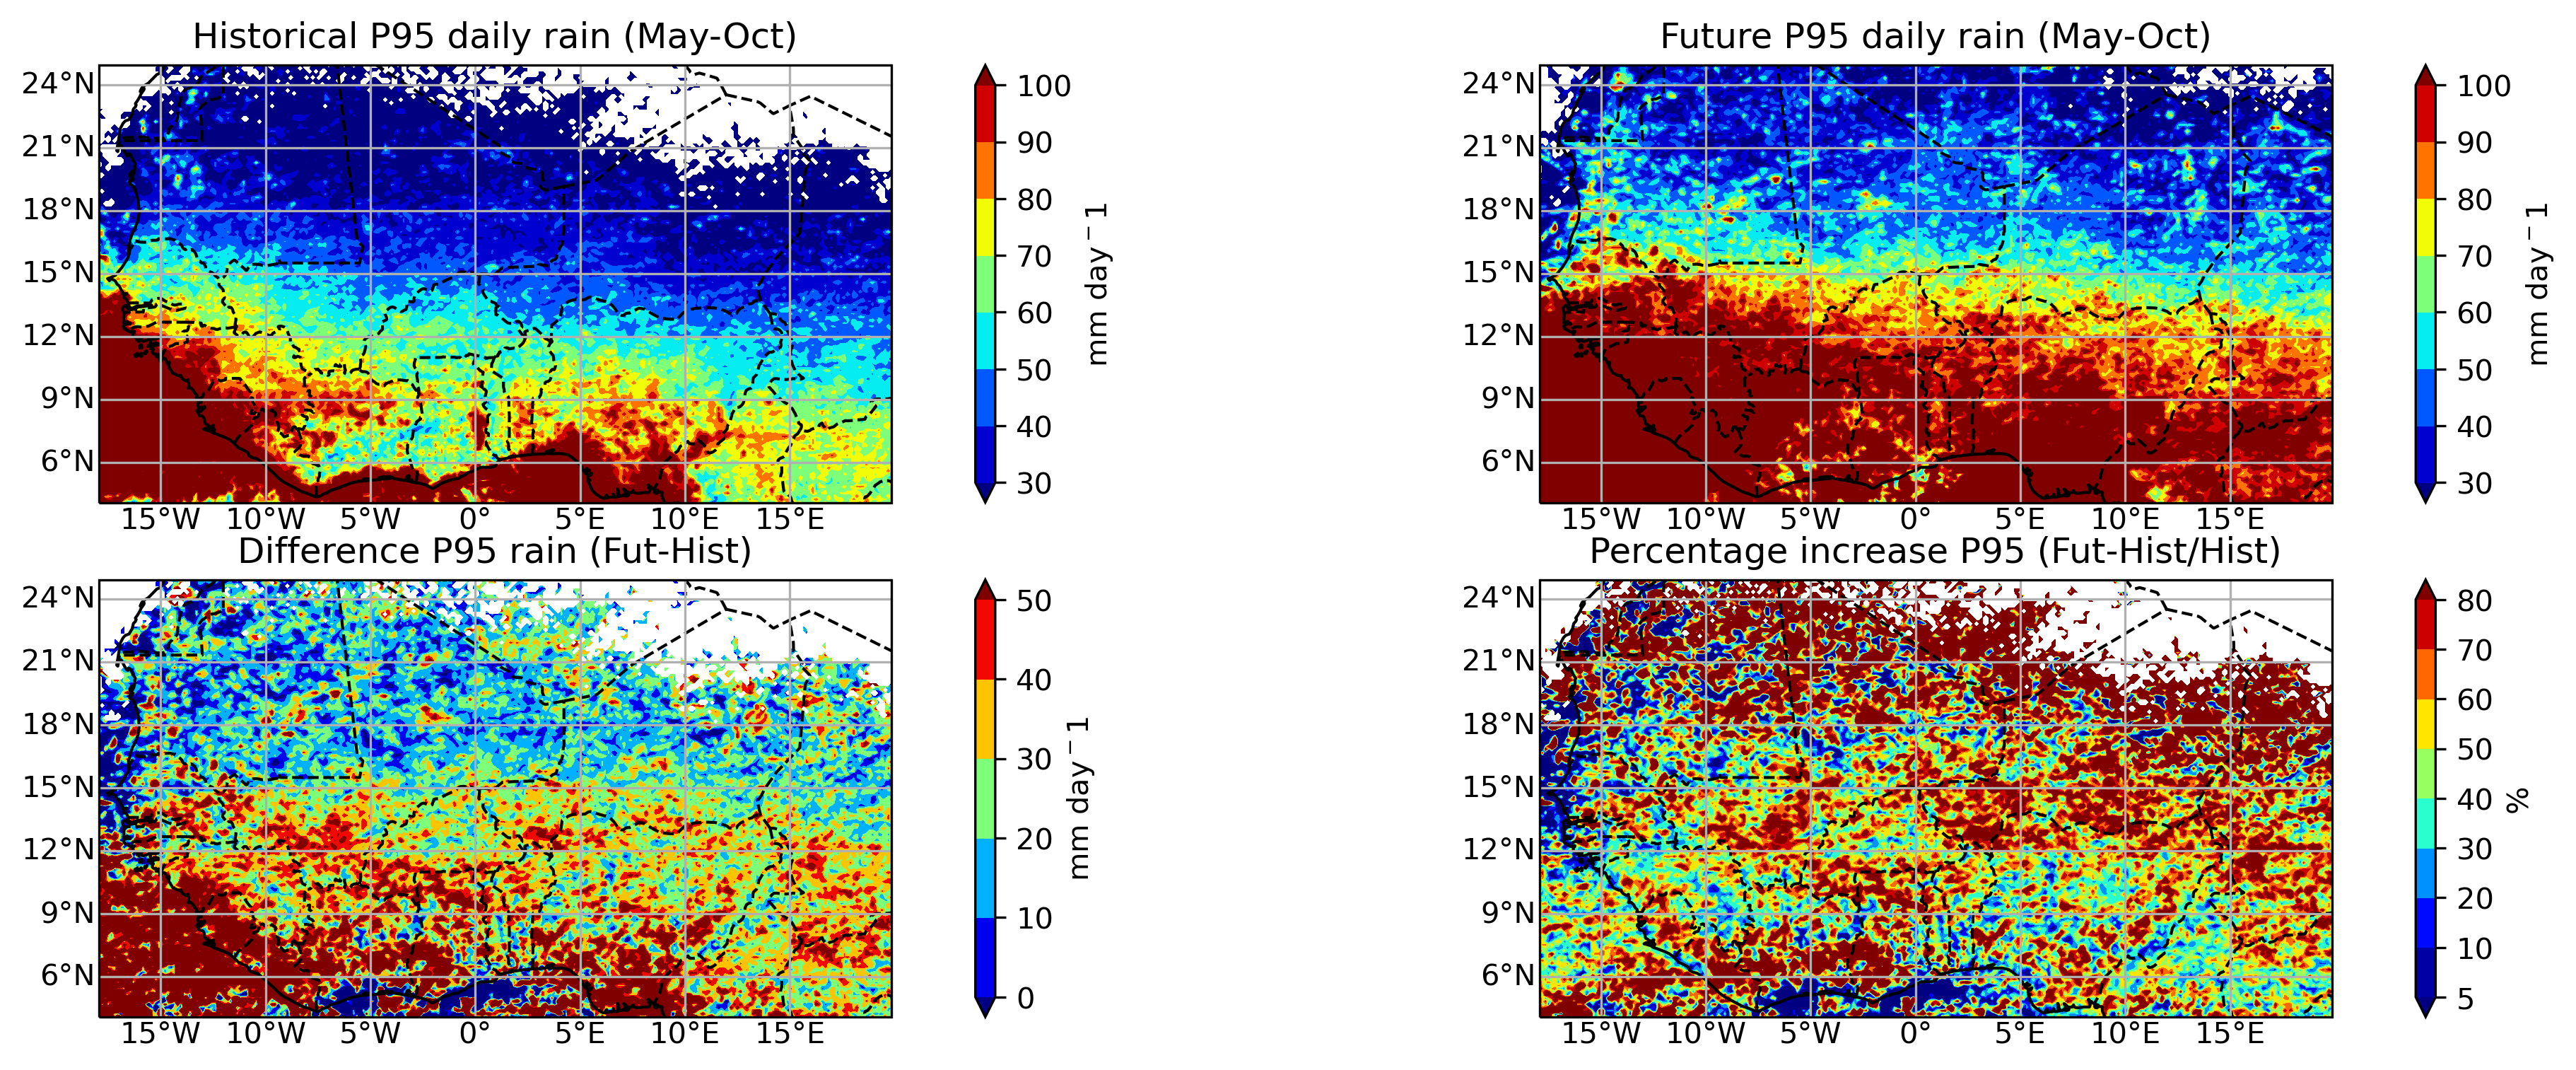

In [8]:
f = plt.figure(figsize=(15,5), dpi=300)

ax = f.add_subplot(221, projection=ccrs.PlateCarree())
draw_map(ax, hm, hm.latitude, hm.longitude, title='Historical P95 daily rain (May-Oct)', levels=np.arange(30,101,10), label=r'mm day$^-1$')
ax1 = f.add_subplot(222, projection=ccrs.PlateCarree())
draw_map(ax1, fm, fm.latitude, fm.longitude, title='Future P95 daily rain (May-Oct)', levels=np.arange(30,101,10), label=r'mm day$^-1$')
ax1 = f.add_subplot(223, projection=ccrs.PlateCarree())
draw_map(ax1, (fm-hm), fm.latitude, fm.longitude, title='Difference P95 rain (Fut-Hist)', levels=np.arange(0,60,10), label=r'mm day$^-1$')
ax1 = f.add_subplot(224, projection=ccrs.PlateCarree())
draw_map(ax1, (fm-hm)/hm*100, fm.latitude, fm.longitude, title='Percentage increase P95 (Fut-Hist/Hist)', levels=[5,10,20,30,40,50,60,70,80], label=r'%')
plt.tight_layout()
#f.savefig('/home/ck/DIR/cornkle/figs/ENDGAME/rory_check/daily_median_percentIncrease_May-Oct.jpg')

In [16]:
tcw_hist = xr.open_dataset('/home/ck/DIR/cornkle/figs/ENDGAME/dave_map/CP4hist_tcwv_daily.nc')
tcw_fut = xr.open_dataset('/home/ck/DIR/cornkle/figs/ENDGAME/dave_map/CP4fut_tcwv_daily.nc')

In [17]:
u600_hist = xr.open_dataset('/home/ck/DIR/cornkle/figs/ENDGAME/dave_map/CP4hist_u600_daily.nc')
u925_hist = xr.open_dataset('/home/ck/DIR/cornkle/figs/ENDGAME/dave_map/CP4hist_u925_daily.nc')

u600_fut = xr.open_dataset('/home/ck/DIR/cornkle/figs/ENDGAME/dave_map/CP4fut_u600_daily.nc')
u925_fut = xr.open_dataset('/home/ck/DIR/cornkle/figs/ENDGAME/dave_map/CP4fut_u925_daily.nc')

In [18]:
tcw_diff = tcw_fut-tcw_hist
shear_diff = (u925_fut-u600_fut) - (u925_hist-u600_hist)
shear_hist =(u925_hist-u600_hist)

In [19]:
tcw_diff = tcw_diff['tcwv'].sel(latitude=slice(3.5,25), longitude=slice(-20,20))
tcw_hist = tcw_hist['tcwv'].sel(latitude=slice(3.5,25), longitude=slice(-20,20))
shear_diff = shear_diff['u_pl'].sel(latitude=slice(3.5,25), longitude=slice(-20,20))
shear_hist = shear_hist['u_pl'].sel(latitude=slice(3.5,25), longitude=slice(-20,20))
# fm = fm.sel(latitude=slice(3.5,25), longitude=slice(-20,20))
# hm = hm.sel(latitude=slice(3.5,25), longitude=slice(-20,20))

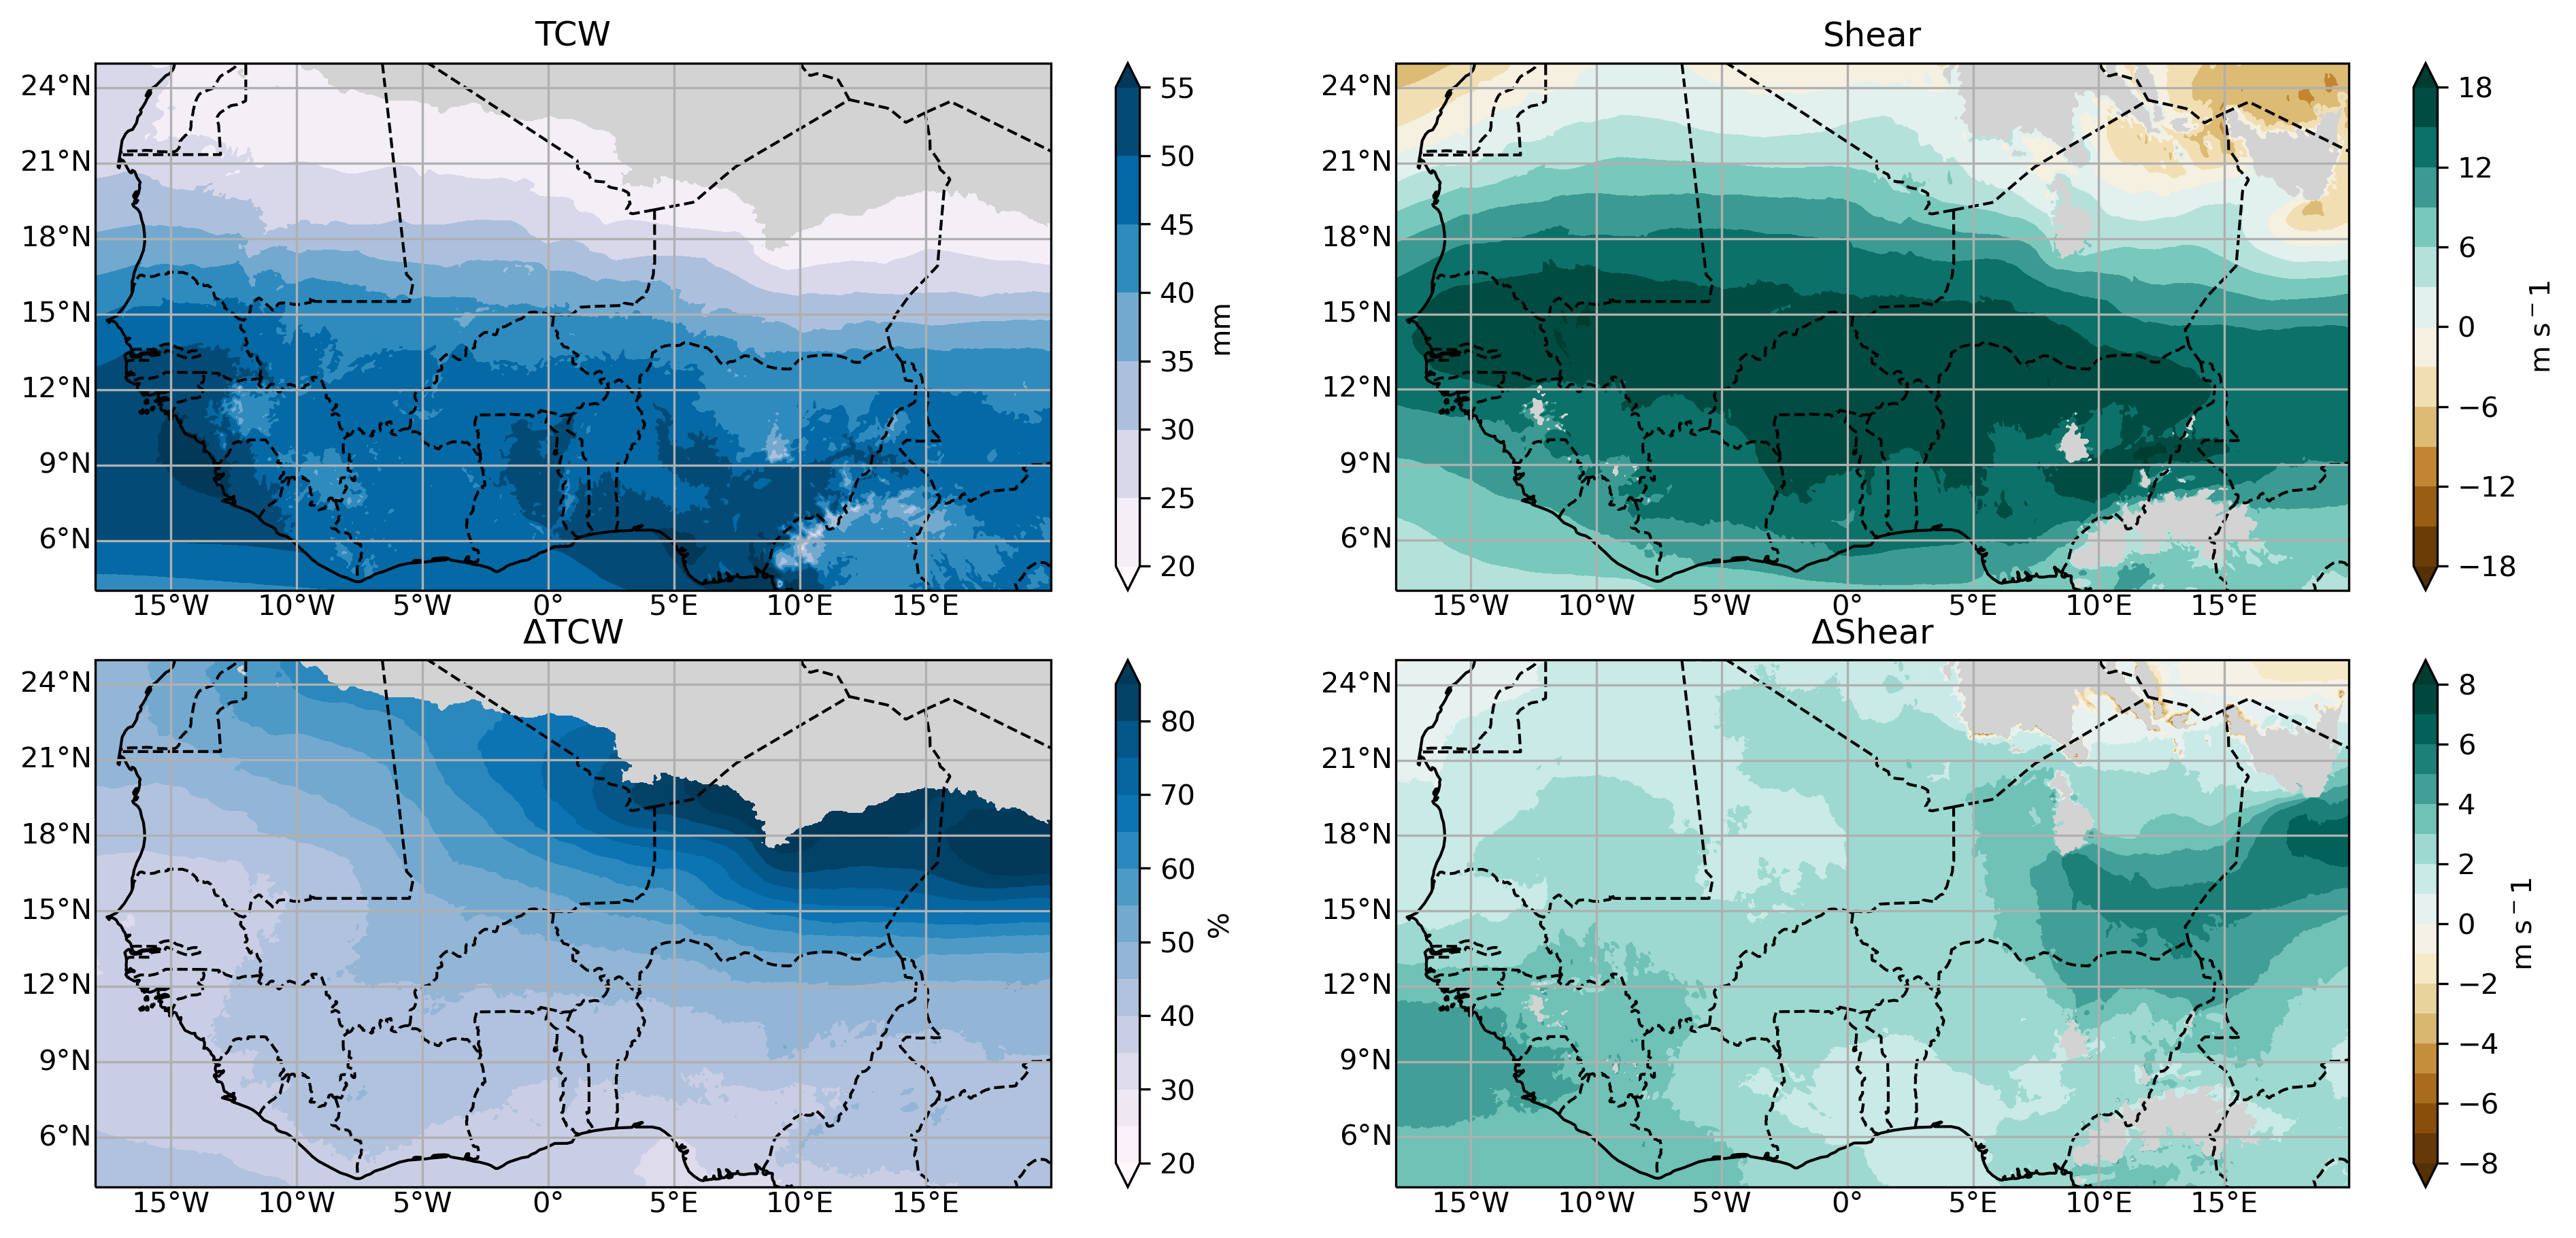

In [48]:
f = plt.figure(figsize=(13,6), dpi=300)

ax2 = f.add_subplot(221, projection=ccrs.PlateCarree())
draw_map(ax2, tcw_hist.where(tcw_hist>20), tcw_diff.latitude, tcw_diff.longitude, title='TCW', levels=np.arange(20,60,5), label=r'mm', cmap='PuBu')
ax3 = f.add_subplot(222, projection=ccrs.PlateCarree())
draw_map(ax3, shear_hist, shear_diff.latitude, shear_diff.longitude, title='Shear', levels=np.arange(-18,19,3), label=r'm s$^-1$', cmap='BrBG')


ax = f.add_subplot(223, projection=ccrs.PlateCarree())
draw_map(ax, tcw_diff.where(tcw_hist>20)/tcw_hist*100, tcw_diff.latitude, tcw_diff.longitude, title='$\Delta$TCW', levels=np.arange(20,90,5), label=r'%', cmap='PuBu')
ax1 = f.add_subplot(224, projection=ccrs.PlateCarree())
draw_map(ax1, shear_diff, shear_diff.latitude, shear_diff.longitude, title='$\Delta$Shear', levels=np.arange(-8,9,1), label=r'm s$^-1$', cmap='BrBG')
plt.tight_layout()
f.savefig('/home/ck/DIR/cornkle/figs/ENDGAME/CP4_TCWSHEAR_baseline.jpg')

In [19]:
tcw_diff.where(tcw_hist['tcwv']>20).shape

(518, 939)

In [22]:
shearfac = 0.71 # monthly: 0.55
tcwvfac = 3.12 # relative change
tcabsfac = 1.22 # absolute change
tcabserrlow = (tcabsfac-2*0.1)
tcabserrhigh = (tcabsfac+2*0.1)
mmPerPercent = tcabsfac/tcwvfac

# tcwvperr = 0.15 #%
# sherr = 0.051 # mm / shear
# shperr = sherr * mmPerPercent

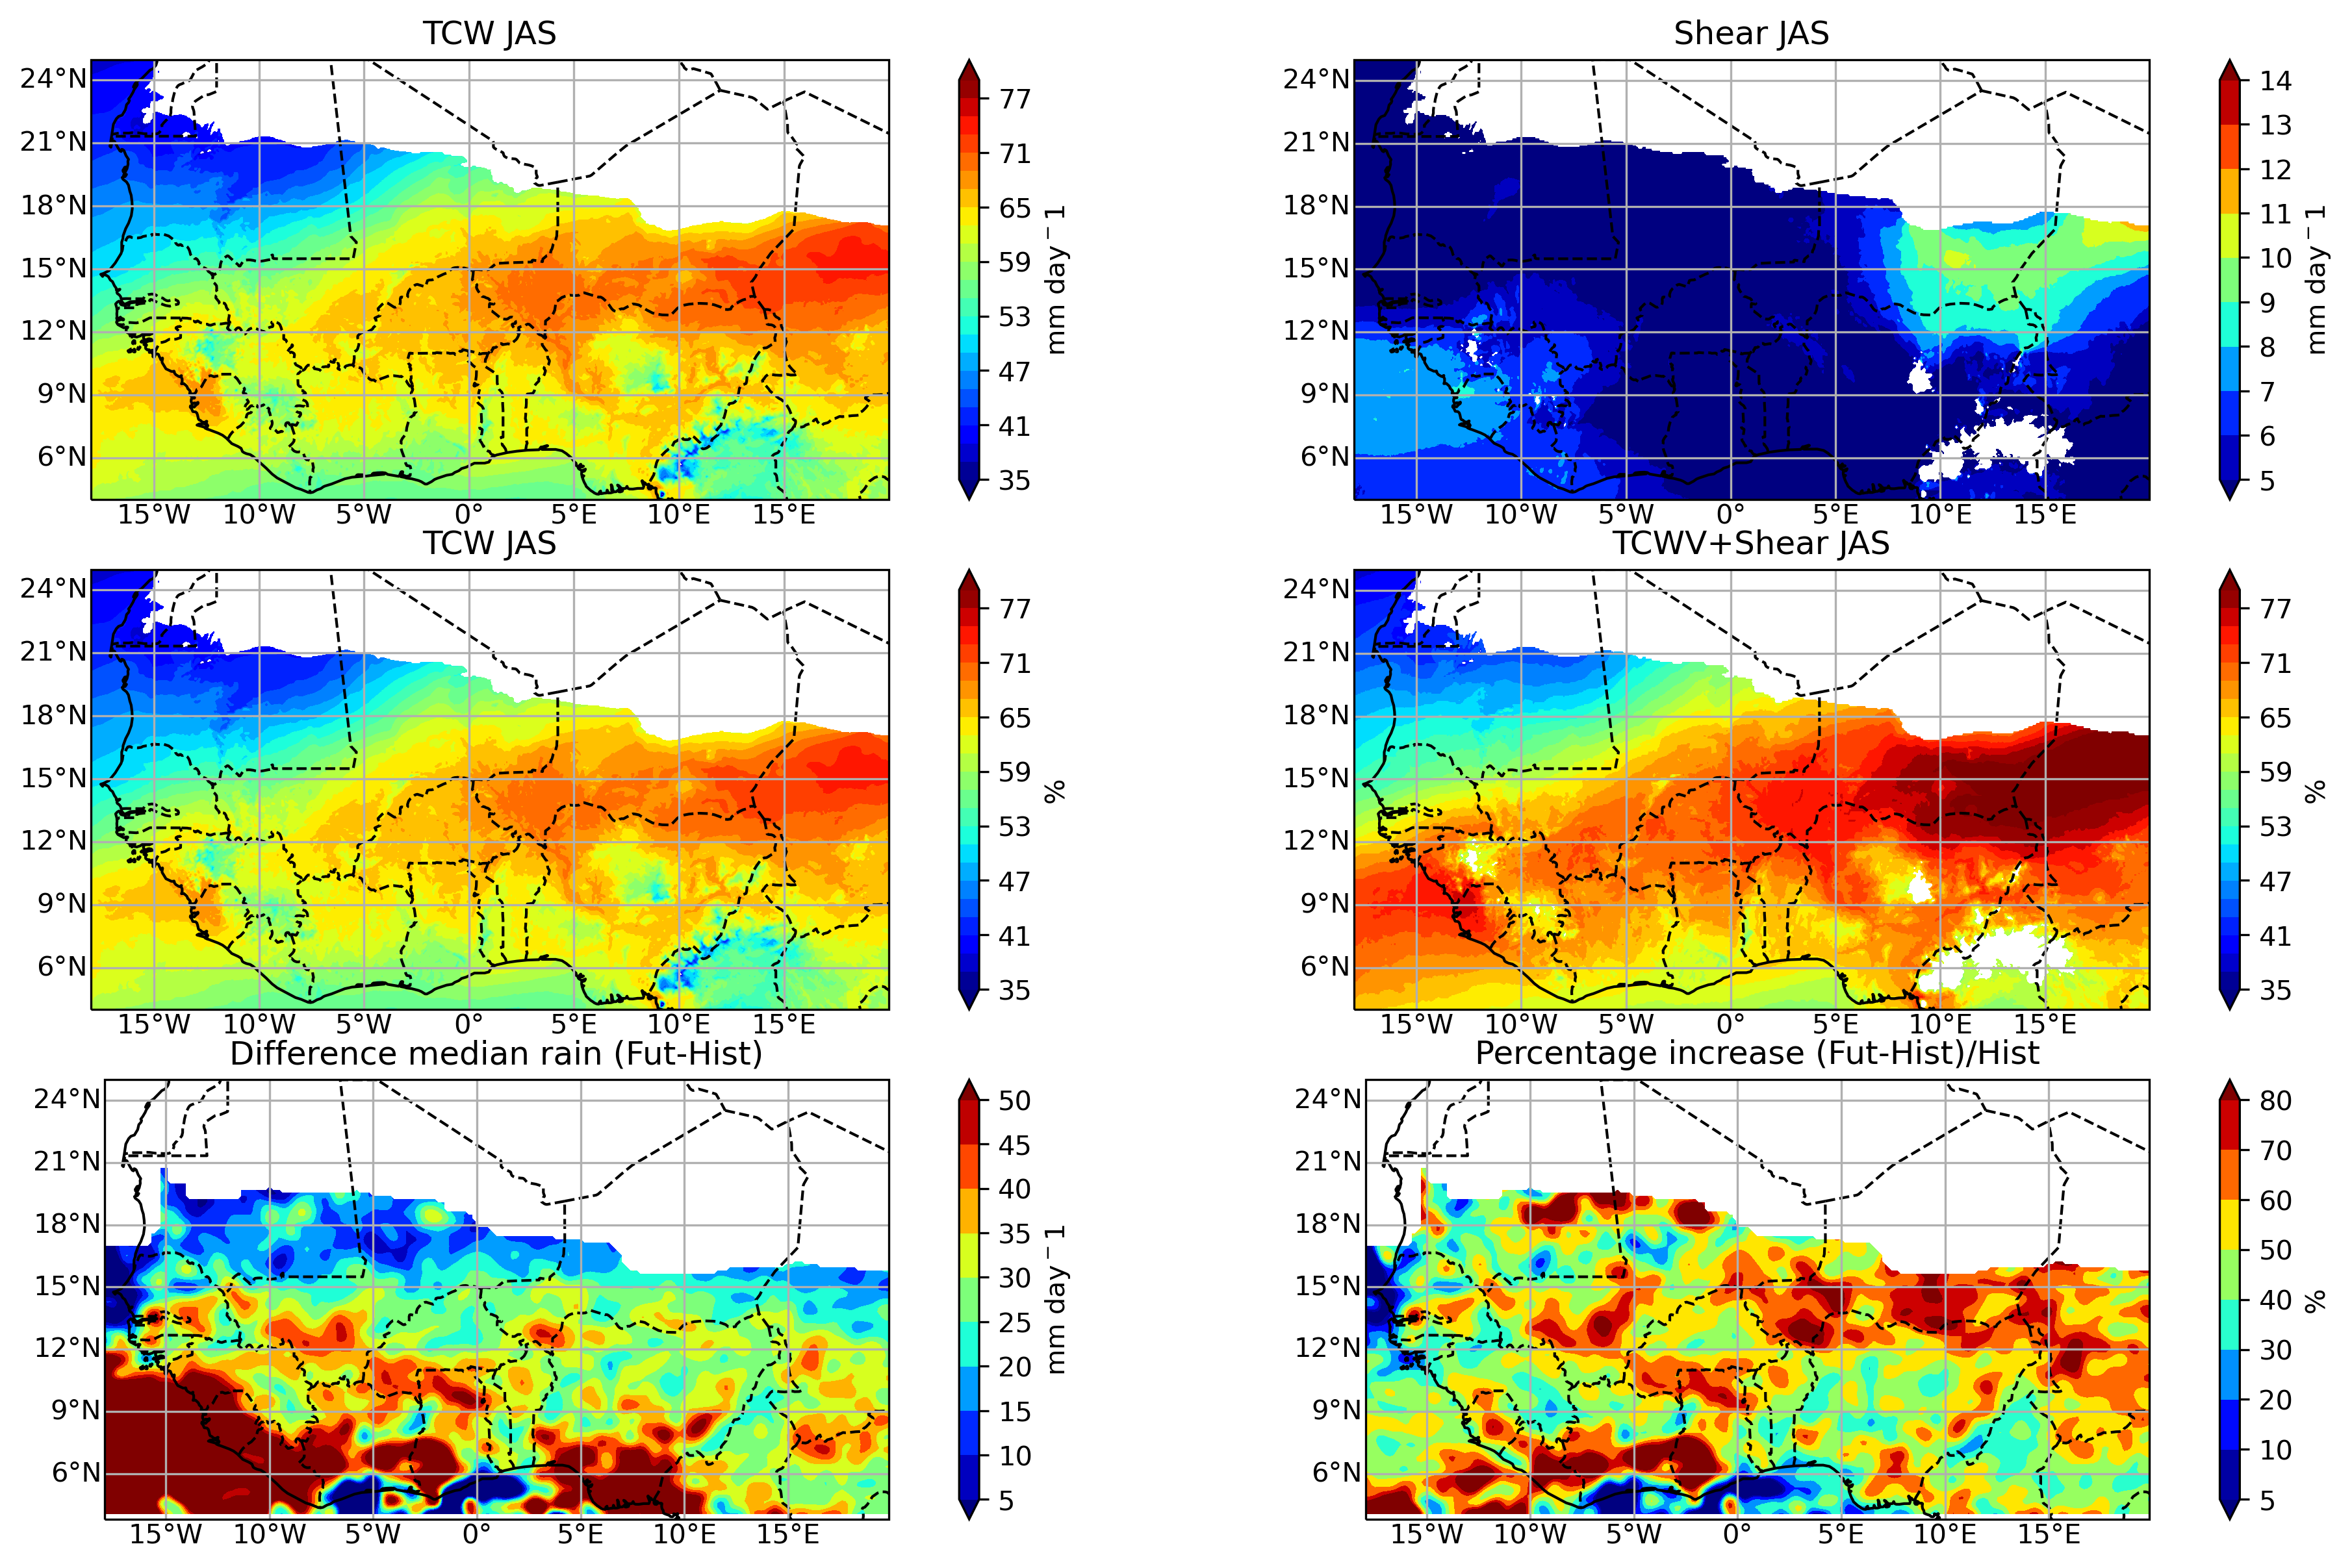

In [42]:
from scipy import ndimage
f = plt.figure(figsize=(14,8), dpi=300)
tthresh = 24.5   # 0.5th centile
thist_on_precip = fm.salem.lookup_transform(tcw_hist['tcwv'])
thist_on_shear = shear_diff.salem.transform(tcw_hist['tcwv'])
tdiff_on_shear = shear_diff.salem.transform(tcw_diff)

#ndimage.gaussian_filter(((dic2['lsta0']) / (dic2['cnt0'])), 2, mode='nearest')

ax = f.add_subplot(321, projection=ccrs.PlateCarree())
draw_map(ax, tcw_diff.where(tcw_hist['tcwv']>tthresh)*tcabsfac/mmPerPercent, tcw_diff.latitude, tcw_diff.longitude, title='TCW JAS', levels=np.arange(35,81,2), label=r'mm day$^-1$')
ax1 = f.add_subplot(322, projection=ccrs.PlateCarree())
draw_map(ax1, shear_diff.where(thist_on_shear>tthresh)*shearfac/mmPerPercent, shear_diff.latitude, shear_diff.longitude, title='Shear JAS', levels=np.arange(5,15,1), label=r'mm day$^-1$')
ax2 = f.add_subplot(323, projection=ccrs.PlateCarree())
draw_map(ax2, tcw_diff.where(tcw_hist['tcwv']>tthresh)*tcabsfac/mmPerPercent, tcw_diff.latitude, tcw_diff.longitude, title='TCW JAS', levels=np.arange(35,81,2), label=r'%')
ax3 = f.add_subplot(324, projection=ccrs.PlateCarree())
draw_map(ax3, ((shear_diff.where(thist_on_shear>tthresh)*shearfac)+(tdiff_on_shear.where(thist_on_shear>tthresh)*tcabsfac))/mmPerPercent, shear_diff.latitude, shear_diff.longitude, title='TCWV+Shear JAS', levels=np.arange(35,81,2), label=r'%')
ax4 = f.add_subplot(325, projection=ccrs.PlateCarree())
ax4.set_ylim(3.8,25)
draw_map(ax4, ndimage.gaussian_filter((fm-hm).where(thist_on_precip>tthresh),2, mode='nearest'), fm.latitude, fm.longitude, title='Difference median rain (Fut-Hist)', levels=[5,10,15,20,25,30,35,40,45,50], label=r'mm day$^-1$')
ax5 = f.add_subplot(326, projection=ccrs.PlateCarree())
ax5.set_ylim(3.8,25)
draw_map(ax5, ndimage.gaussian_filter(((fm-hm)/hm*100).where(thist_on_precip>tthresh),2, mode='nearest'), fm.latitude, fm.longitude, title='Percentage increase (Fut-Hist)/Hist', levels=[5,10,20,30,40,50,60,70,80], label=r'%')
plt.tight_layout()
#f.savefig('/home/ck/DIR/cornkle/figs/ENDGAME/rory_check/daily_median_percentIncrease_May-Oct.jpg')

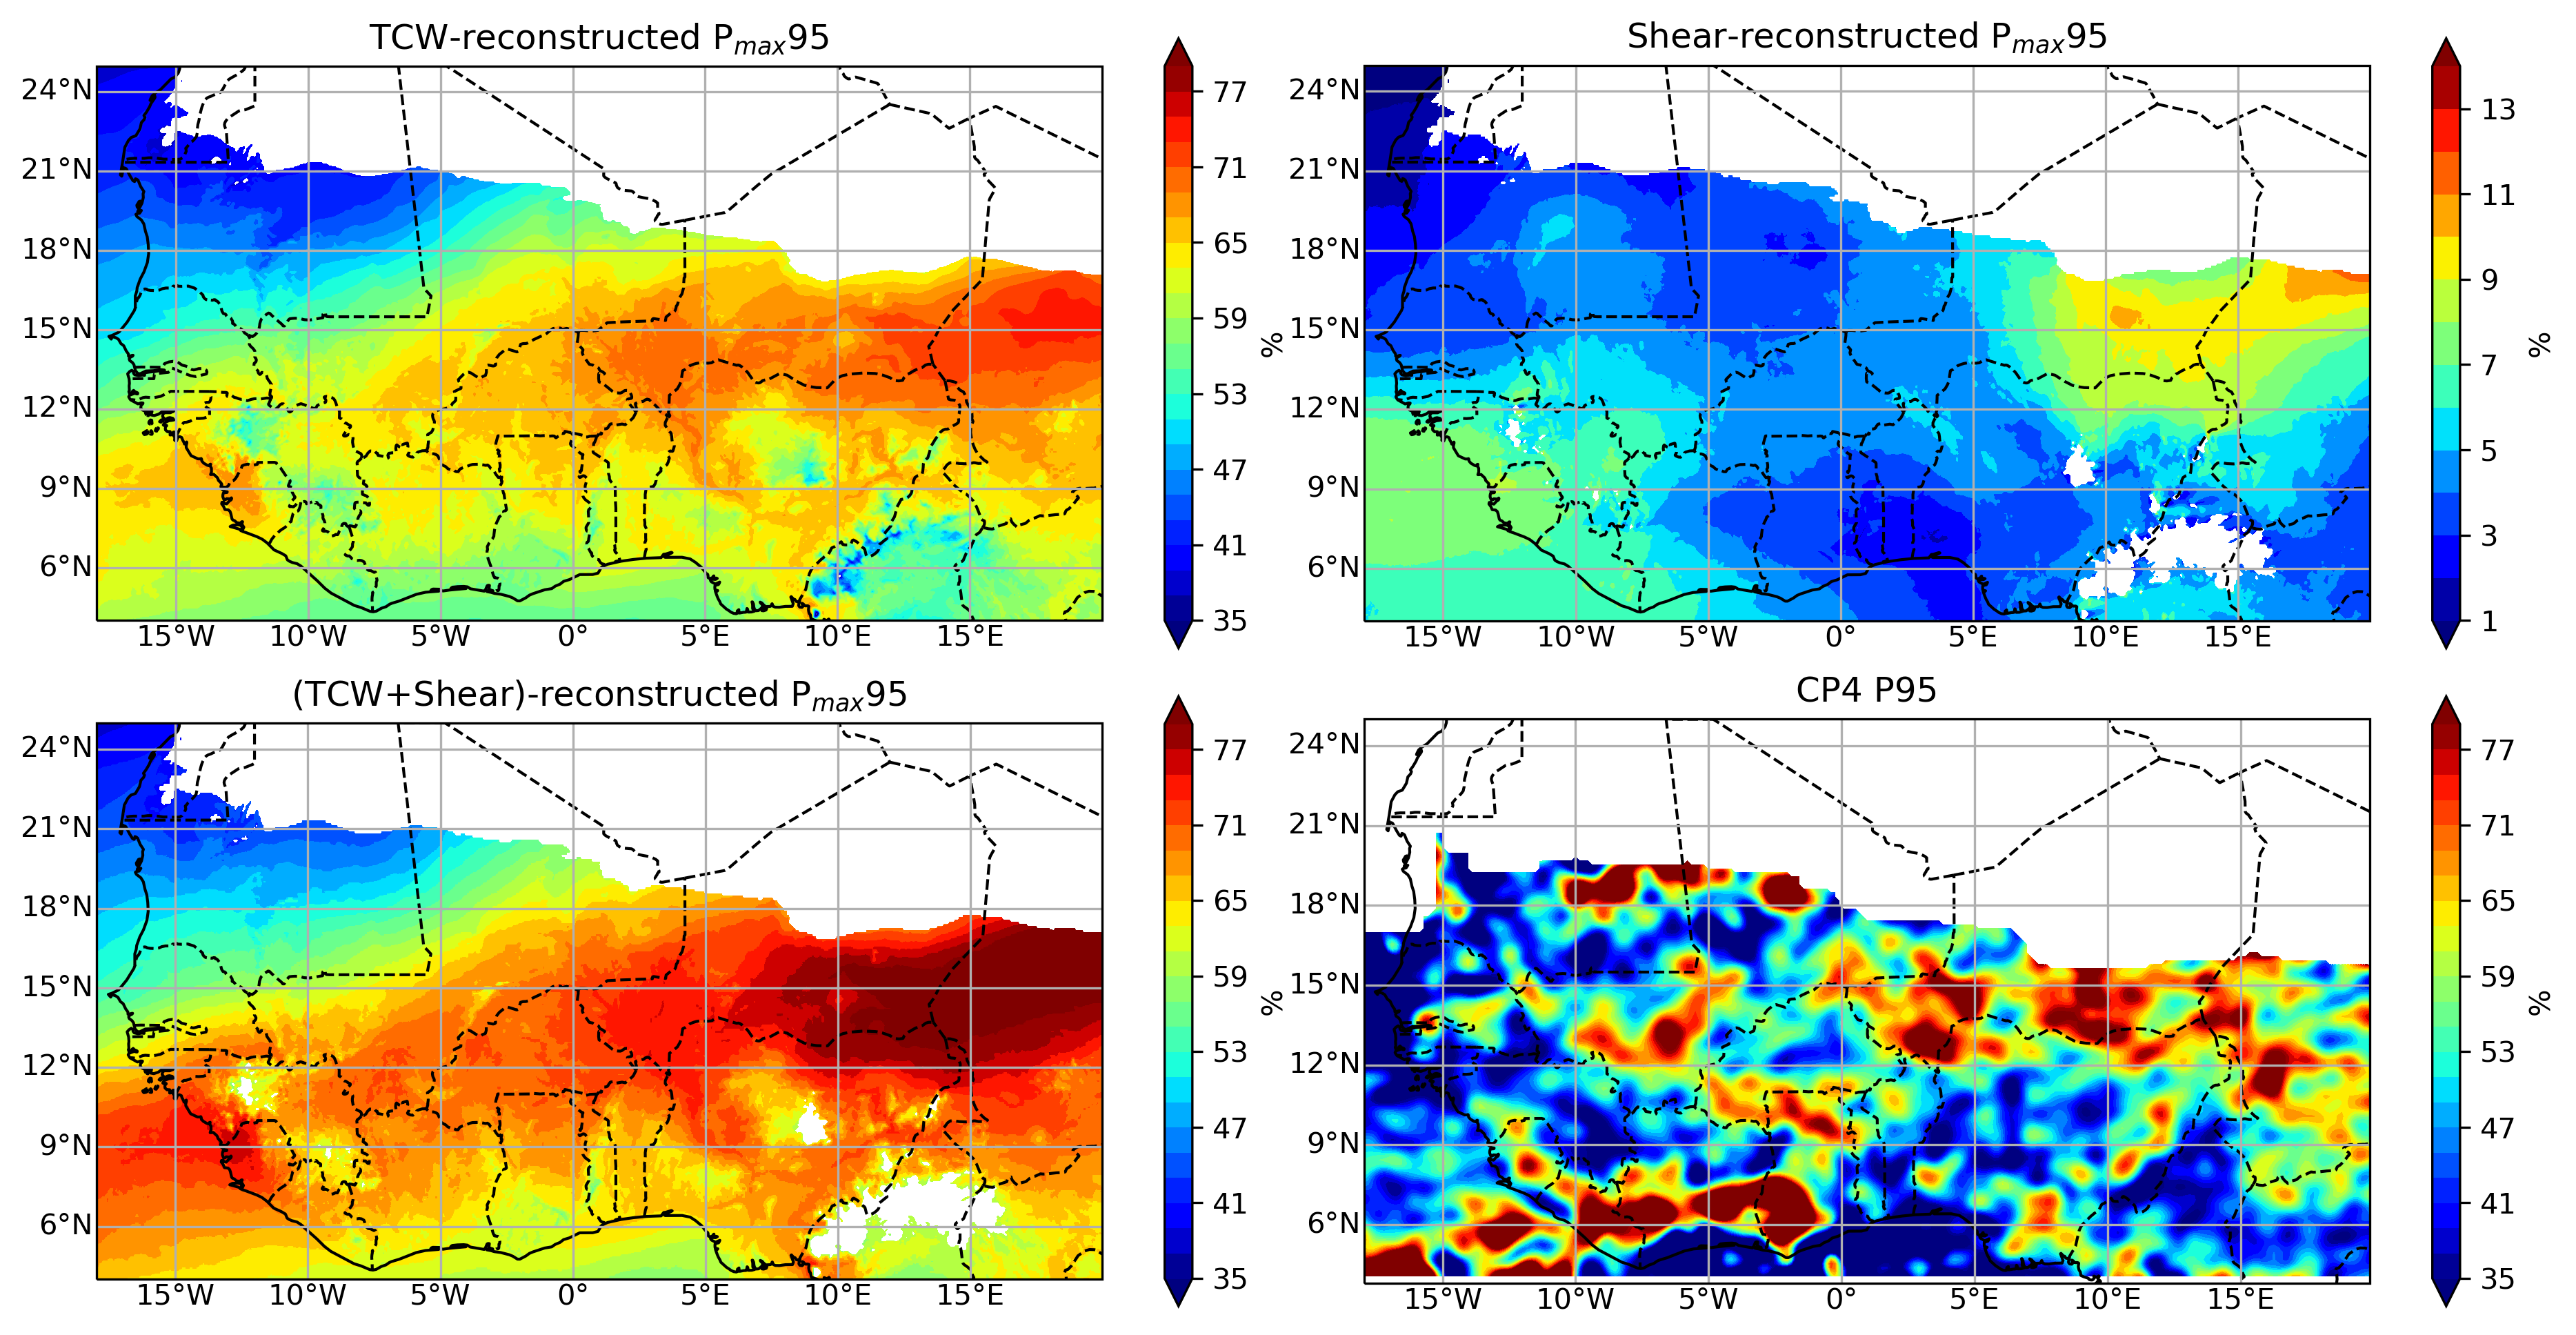

In [49]:
from scipy import ndimage
f = plt.figure(figsize=(12.5,6.5), dpi=300)
tthresh = 24.5   # 0.5th centile
thist_on_precip = fm.salem.lookup_transform(tcw_hist['tcwv'])
thist_on_shear = shear_diff.salem.transform(tcw_hist['tcwv'])
tdiff_on_shear = shear_diff.salem.transform(tcw_diff)

#ndimage.gaussian_filter(((dic2['lsta0']) / (dic2['cnt0'])), 2, mode='nearest')

ax2 = f.add_subplot(221, projection=ccrs.PlateCarree())
draw_map(ax2, tcw_diff.where(tcw_hist['tcwv']>tthresh)*tcabsfac/mmPerPercent, tcw_diff.latitude, tcw_diff.longitude, title='TCW-reconstructed P$_{max}$95', levels=np.arange(35,81,2), label=r'%')
ax3 = f.add_subplot(222, projection=ccrs.PlateCarree())
draw_map(ax3, (shear_diff.where(thist_on_shear>tthresh)*shearfac)/mmPerPercent, shear_diff.latitude, shear_diff.longitude, title='Shear-reconstructed P$_{max}$95', levels=np.arange(1,15,1), label=r'%')
ax3 = f.add_subplot(223, projection=ccrs.PlateCarree())
draw_map(ax3, ((shear_diff.where(thist_on_shear>tthresh)*shearfac)+(tdiff_on_shear.where(thist_on_shear>tthresh)*tcabsfac))/mmPerPercent, shear_diff.latitude, shear_diff.longitude, title='(TCW+Shear)-reconstructed P$_{max}$95', levels=np.arange(35,81,2), label=r'%')

ax5 = f.add_subplot(224, projection=ccrs.PlateCarree())
ax5.set_ylim(3.8,25)
draw_map(ax5, ndimage.gaussian_filter(((fm-hm)/hm*100).where(thist_on_precip>tthresh),2, mode='nearest'), fm.latitude, fm.longitude, title='CP4 P95', levels=np.arange(35,81,2), label=r'%')
plt.tight_layout()
f.savefig('/home/ck/DIR/cornkle/figs/ENDGAME/CP4_reconstructed_JASrain.jpg')